In [1]:
# Les ressources qui vont bien 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
# https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
# https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f
# https://stackoverflow.com/questions/22898824/filtering-pandas-dataframes-on-dates
# https://datatofish.com/if-condition-in-pandas-dataframe/

# Always import python libraries before any others
# This is a convention
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



# Commande magique permettant d'utiliser matplotline de 
# génerer les graph dans jupyter
%matplotlib inline

# On charge les données depuis le fichier csv
data_path = Path("C:/Users/MarieEtMax/jupy-notebooks/data/transportmaritime.csv")
df = pd.read_csv(data_path, sep=";")

# maintenant qu'on a nos données, on a envie de les cleaner un peu
# On retire les éventuelles lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Par simplification, on renomme une des colonnes
df.rename(columns={'nb_passagers':'nb_pass'}, inplace=True)

# Puis on change le type str de la clonne date vers un vrai type de date !
df['date'] = pd.to_datetime(df['date'])
# Puis on vire les float pour en faire des int
df['nb_pass'] = df['nb_pass'].astype(int)



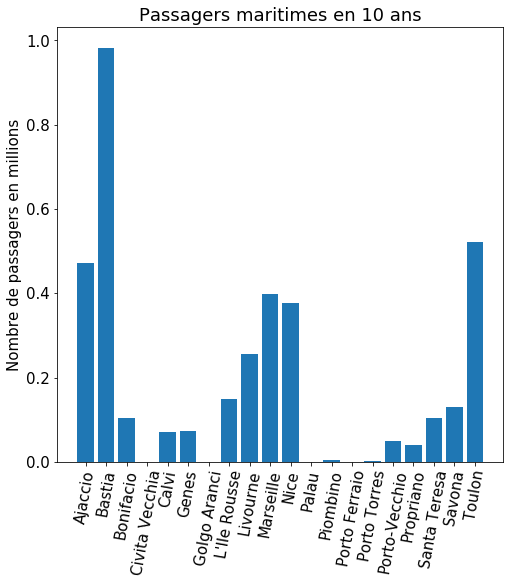

In [2]:
# Ici, je veux un graphique en histogramme me montrant :
# le total cumulé de tous les passagers de ces 10 dernières années

# On commence par choper uniquement les 10 dernières années
# Pas compris comment on utilise les pd.tseries.offsets.YearBegin(10)
graph1 = df[(df['date'] > '2009.1.1')]

# On chope la somme de tous les passagers, puis on vire le upper case de merde
graph1 = graph1[['port', 'nb_pass']].groupby(['port']).sum()
graph1.rename(index={'CIVITA VECCHIA':'Civita Vecchia'}, inplace=True)

# On passe en million pour faciliter l'affichage
graph1['nb_pass'] = graph1['nb_pass'] / 10000000

# Tuning de paramètres, merci matplotlib, tu gères
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8,8))
plt.title('Passagers maritimes en 10 ans')
plt.ylabel('Nombre de passagers en millions')
plt.xticks(rotation=80)
plt.bar(graph1.index.tolist(), height=graph1.nb_pass)

# Les paramètres sont remis à défaut 
mpl.rcParams.update(mpl.rcParamsDefault)


In [48]:
# Ici, je veux un graphique qui montre l'évolution des passagers, avec :
# les ports en index, le nombre de passagers en y, les années en x

# On commence par remettre les paramètres par défaut de matplotlib
mpl.rcParams.update(mpl.rcParamsDefault)

#print(df.head(2)) = 
#         date          port  nb_pass
# 0 2007-04-01  Santa Teresa    21717
# 1 2007-05-01         Palau        0


# test1 = df[(df['date'] > '2010.1.1')].groupby([['date']])['nb_pass'].sum()

# On ne chope les données qu'à partir de 2010, parce que voilà, ta gueule
test1 = df[(df['date'] > '2009.12.30')]
# On chope le nom de tous les ports 
ports = pd.unique(test1['port'])

dates = pd.unique(test1['date'])
print(dates)
# On construit une nouvelle DF() avec comme index les dates
test2 = pd.DataFrame(index=dates)
print(test2)


#test2








# test1.groupby([['date', 'port']])['nb_pass'].sum()
# test1 = test1.groupby(['date', 'port'])['nb_pass'].sum()
# test1.groupby(['date'])['nb_pass'].cumsum()
# test1.groupby(['port']).sum()

# print(test1.groupby(['date'])['port'].count())
# test1.where('port' == 'Ajaccio')

# test1.loc[test1.port == 'Ajaccio'].groupby('date').sum()



# Il me faut les dates en index

# Une colonne par port, et le nbr_pas de cette année là

#                    A         B         C         D
# 2000-01-01  1.037990 -1.486673  0.362738  0.822253
# 2000-01-02  0.086618  0.716967 -1.164582  2.237458
# ...              ...       ...       ...       ...
# 2002-09-22  0.140176 -0.502498 -1.157095  1.357235
# 2002-09-23  0.761212  0.258342  1.863796  0.512465



['2010-01-01T00:00:00.000000000' '2010-02-01T00:00:00.000000000'
 '2010-03-01T00:00:00.000000000' '2010-04-01T00:00:00.000000000'
 '2010-05-01T00:00:00.000000000' '2010-07-01T00:00:00.000000000'
 '2010-09-01T00:00:00.000000000' '2010-10-01T00:00:00.000000000'
 '2011-04-01T00:00:00.000000000' '2011-05-01T00:00:00.000000000'
 '2011-06-01T00:00:00.000000000' '2011-08-01T00:00:00.000000000'
 '2011-09-01T00:00:00.000000000' '2011-10-01T00:00:00.000000000'
 '2011-11-01T00:00:00.000000000' '2011-12-01T00:00:00.000000000'
 '2012-02-01T00:00:00.000000000' '2012-03-01T00:00:00.000000000'
 '2012-05-01T00:00:00.000000000' '2012-07-01T00:00:00.000000000'
 '2012-08-01T00:00:00.000000000' '2012-11-01T00:00:00.000000000'
 '2012-12-01T00:00:00.000000000' '2013-01-01T00:00:00.000000000'
 '2013-03-01T00:00:00.000000000' '2010-06-01T00:00:00.000000000'
 '2010-08-01T00:00:00.000000000' '2010-12-01T00:00:00.000000000'
 '2011-01-01T00:00:00.000000000' '2011-07-01T00:00:00.000000000'
 '2012-04-01T00:00:00.000

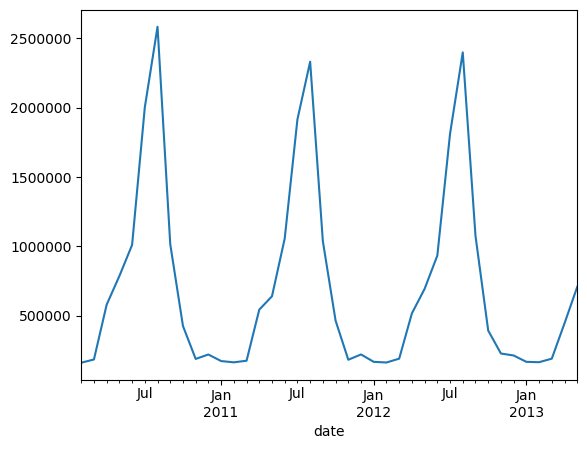

In [4]:
# Petite demonstration technique de la puissance de pandas
df[(df['date'] > '2010.1.1')].groupby(['date'])['nb_pass'].sum().plot()
# Intéressant de voir à quel point le traffic prend place en été

In [29]:
# ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

# print(ts)
# ts = ts.cumsum()
# print(ts)

# tmp = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
# print(tmp)
# tmp = tmp.cumsum()

# plt.figure();

# tmp.plot();

In [31]:
yo = pd.DataFrame([[2.0, 1.0],
                   [3.0, np.nan],
                   [1.0, 0.0]],
                   columns=list('AB'))
print(yo)
yo.cumsum()

     A    B
0  2.0  1.0
1  3.0  NaN
2  1.0  0.0


,A,B
0,2.0,1.0
1,5.0,NaN
2,6.0,1.0
